In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import sys

%matplotlib inline



In [3]:
#!/usr/bin/env python
import psutil
# gives a single float value
psutil.cpu_percent()
# gives an object with many fields
psutil.virtual_memory()
# you can convert that object to a dictionary 
dict(psutil.virtual_memory()._asdict())

{'total': 68719476736,
 'available': 60912541696,
 'percent': 11.4,
 'used': 6697226240,
 'free': 53676564480,
 'active': 2102935552,
 'inactive': 7080730624,
 'wired': 4594290688}

In [4]:
def readexcel(file):
    """ Reading in excel sheet column. returning array."""
    df = pd.read_excel(file)
    array = df['CAP ID'].to_numpy(dtype=str)
    # iterate over array[i] for ID
    return array

In [2]:
def plot_image_grid(images, path_to_images, save_path=None):
    num_images = len(images)
    num_rows = num_images
    num_cols = 5
    
    fig, axarr = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))
    fig.subplots_adjust(hspace=0.3)
    fig.suptitle('Image Grid', fontsize=20, y=1.05)
    
    for i, basename in enumerate(images):
        row_title = basename
        
        for j in range(num_cols):
            img_path = Path(path_to_images) / f"{basename}{image_files[j]}"
            img = plt.imread(str(img_path))
            ax = axarr[i, j]
            ax.imshow(img)
            ax.axis('off')
        
        axarr[i, 0].set_ylabel(row_title, rotation=0, ha='right', va='center', fontsize=16)
    
    if save_path is not None:
        save_path = Path(save_path)
        save_path.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(str(save_path), dpi=300)
    
    plt.show()

In [7]:




root = Path(".").resolve().parent
# input IDs path
path2file = Path(root, 'examples')
file = Path(path2file, '20230213_tetralogy_HLHS_slides_patients_list.xlsx')
name_file = Path(path2file, '20230328_HLHStetralogy_coloredcobivecoX_names.xlsx')
# get the model IDs
id_array = readexcel(file)
name_array = readexcel(name_file)
image_files = ["_tv.png", "_tm.png", "_bridges_rt.png", "_ventricles_rt.png","_ab_sideview.png"]
dir_name = "20230113_screenshot_results"
results_directory = Path(path2file, str(dir_name))

images = id_array
rowtitle = name_array
path_to_images = results_directory
save_path = f'{results_directory}/test.png'

#plot_image_grid(images, path_to_images, save_path)

In [ ]:
def plot_image_grid_rowtitles(images, path_to_images, rowtitle, save_path=None):
    num_images = len(images)
    num_rows = num_images
    num_cols = 5
    
    fig, axarr = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))
    fig.subplots_adjust(hspace=0.3)
    fig.suptitle('Image Grid', fontsize=20, y=1.05)
    
    for i, basename in enumerate(images):
        row_title = rowtitle[i]
        
        for j in range(num_cols):
            img_path = Path(path_to_images) / f"{basename}{image_files[j]}"
            img = plt.imread(str(img_path))
            ax = axarr[i, j]
            ax.imshow(img)
            ax.axis('off')
        
        axarr[i, 0].set_ylabel(row_title, rotation=0, ha='right', va='center', fontsize=16)
        axarr[i, 0].yaxis.set_label_position("left")
        axarr[i, 0].yaxis.tick_left()
        axarr[i, 0].yaxis.set_tick_params(pad=20)
        
    
    if save_path is not None:
        save_path = Path(save_path)
        save_path.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(str(save_path), dpi=300)
    
    plt.show()


In [ ]:
plot_image_grid_rowtitles(images, path_to_images, rowtitle)

In [ ]:

def plot_image_grid_rowtitle(images, path_to_images, rowtitle, save_path=None):
    num_images = len(images)
    num_rows = num_images
    num_cols = 5
    
    fig, axarr = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))
    fig.subplots_adjust(hspace=0.05)
    fig.suptitle('Image Grid', fontsize=20, y=1.05)
    
    for i, basename in enumerate(images):
        row_title = rowtitle[i]
        
        for j in range(num_cols):
            img_path = Path(path_to_images) / f"{basename}{image_files[j]}"
            img = plt.imread(str(img_path))
            ax = axarr[i, j]
            ax.imshow(img)
            ax.axis('off')
        
        axarr[i, 0].text(-0.5, 0.5, row_title, rotation=90, ha='center', va='center', fontsize=16)
        axarr[i, 0].set_ylabel('')
        axarr[i, 0].tick_params(left=False, labelleft=False)
        axarr[i, 0].set_ylim((num_cols, 0))
    
    if save_path is not None:
        save_path = Path(save_path)
        save_path.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(f"{str(save_path)}+.pdf")
    
    plt.show()


In [ ]:
plot_image_grid_rowtitle(images, path_to_images, rowtitle)

In [8]:
## Crop images in palce and create nice pdf

In [15]:
# crop images in place
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def plot_image_grid(images, path_to_images, rowtitle, crop=None, save_path=None):
    num_images = len(images)
    num_rows = num_images
    num_cols = 5
    
    fig, axarr = plt.subplots(num_rows, num_cols, figsize=(12, 2*num_rows))
    fig.subplots_adjust(hspace=0.0)
    #fig.subplots_adjust(wspace=0.2, hspace=0.2, top=0.95, bottom=0.05), constrained layout
    #fig.suptitle('Image Grid', fontsize=20, y=1.05)
    
    for i, basename in enumerate(images):
        row_title = rowtitle[i]
        
        for j in range(num_cols):
            img_path = Path(path_to_images) / f"{basename}{image_files[j]}"
            img = plt.imread(str(img_path))
            if crop is not None:
                # Compute crop size
                h, w = img.shape[:2]
                c_h, c_w = int(h/2), int(w/2)
                crop_size = int(min(h, w) * crop / 2)
                # Crop the image
                img = img[c_h-crop_size:c_h+crop_size, c_w-crop_size:c_w+crop_size, :]
            ax = axarr[i, j]
            ax.imshow(img)
            ax.axis('off')
        
        #axarr[i, 0].text(-0.5, 0.5, row_title, rotation=90, ha='center', va='center', fontsize=16)
        axarr[i, 0].set_ylabel('')
        axarr[i, 0].tick_params(left=False, labelleft=False)
        #axarr[i, 0].set_ylim((num_cols, 0))
    
    if save_path is not None:
        save_path = Path(save_path)
        save_path.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(str(save_path), dpi=3000, format='pdf')
        #plt.tight_layout()
        plt.tight_layout(pad=-2.0)
        #plt.subplot_tool()
        #plt.tight_layout(pad=0.04, w_pad=0.05, h_pad=0.02)
    
    plt.show()


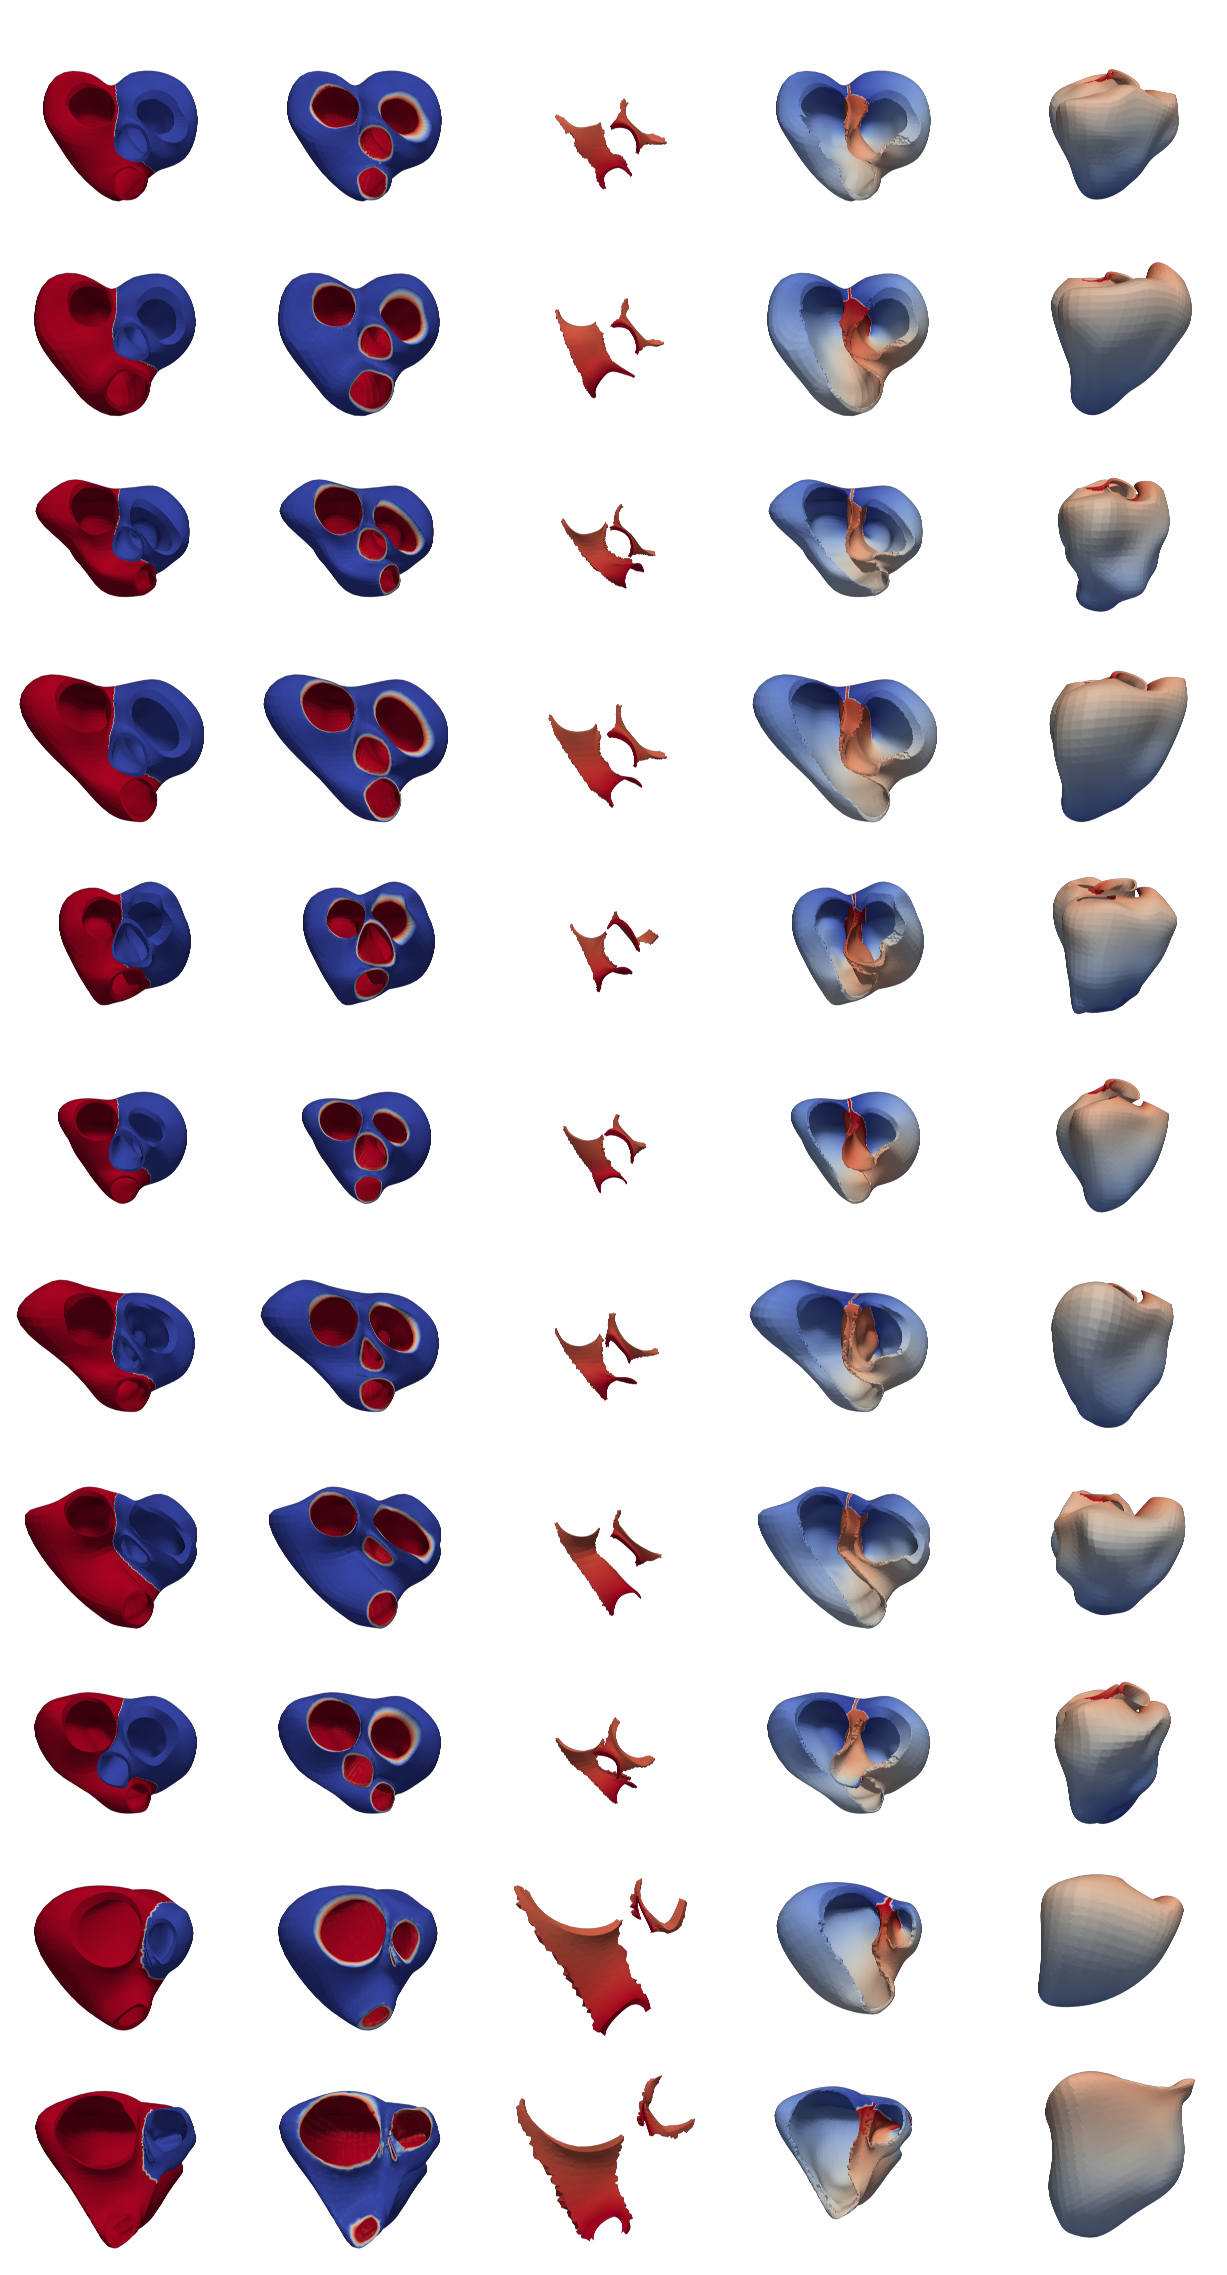

In [16]:
# plot
plot_image_grid(images, path_to_images, rowtitle, crop=0.90, save_path="image_grid300.pdf")


In [ ]:
# crop images in place
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def plot_image_grid(images, path_to_images, rowtitle, crop=None, save_path=None):
    num_images = len(images)
    num_rows = num_images
    num_cols = 5
    
    fig, axarr = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))
    fig.subplots_adjust(hspace=0.3)
    fig.suptitle('Image Grid', fontsize=20, y=1.05)
    
    for i, basename in enumerate(images):
        row_title = rowtitle[i]
        
        for j in range(num_cols):
            img_path = Path(path_to_images) / f"{basename}{image_files[j]}"
            img = plt.imread(str(img_path))
            if crop is not None:
                # Compute crop size
                h, w = img.shape[:2]
                c_h, c_w = int(h/2), int(w/2)
                crop_size = int(min(h, w) * crop / 2)
                # Crop the image
                img = img[c_h-crop_size:c_h+crop_size, c_w-crop_size:c_w+crop_size, :]
            ax = axarr[i, j]
            ax.imshow(img)
            ax.axis('off')
        
            if j == 0:
                axarr[i, 0].text(-0.2, 0.5, row_title, fontsize=14, va='center', ha='right', rotation=90)
                
    for j in range(num_cols):
        axarr[0, j].set_title(f"Column {j+1}", fontsize=16)
        axarr[0, j].title.set_position([.5, 1.2])
        #axarr[i, 0].set_ylim((num_cols, 0))
        
    if save_path is not None:
        save_path = Path(save_path)
        save_path.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(str(save_path), dpi=300)
    
    plt.show()


In [ ]:
# plot
plot_image_grid(images, path_to_images, rowtitle, crop=0.89, save_path="image_grid.png")


In [ ]:
# save cropped images in place

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def plot_image_grid(images, path_to_images, rowtitle, crop=None, save_path=None):
    num_images = len(images)
    num_rows = num_images
    num_cols = 5
    
    fig, axarr = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))
    fig.subplots_adjust(hspace=0.3)
    fig.suptitle('Image Grid', fontsize=20, y=1.05)
    
    for i, basename in enumerate(images):
        row_title = rowtitle[i]
        
        for j in range(num_cols):
            img_path = Path(path_to_images) / f"{basename}_column{j+1}.png"
            img = plt.imread(str(img_path))
            if crop is not None:
                # Compute crop size
                h, w = img.shape[:2]
                c_h, c_w = int(h/2), int(w/2)
                crop_size = int(min(h, w) * crop / 2)
                # Crop the image
                img = img[c_h-crop_size:c_h+crop_size, c_w-crop_size:c_w+crop_size, :]
                # Save cropped image
                cropped_path = Path(save_path).parent / f"{basename}_cropped_column{j+1}.png"
                plt.imsave(str(cropped_path), img)
            ax = axarr[i, j]
            ax.imshow(img)
            ax.axis('off')
        
        axarr[i, 0].text(-0.5, 0.5, row_title, rotation=90, ha='center', va='center', fontsize=16)
        axarr[i, 0].set_ylabel('')
        axarr[i, 0].tick_params(left=False, labelleft=False)
        axarr[i, 0].set_ylim((num_cols, 0))
    
    if save_path is not None:
        save_path = Path(save_path)
        save_path.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(str(save_path), dpi=300)
    
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def plot_image_grid(images, path_to_images, rowtitle, crop=None, save_path=None):
    num_images = len(images)
    num_rows = num_images
    num_cols = 5
    
    fig, axarr = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))
    fig.subplots_adjust(hspace=0.3)
    fig.suptitle('Image Grid', fontsize=20, y=1.05)
    
    for i, basename in enumerate(images):
        row_title = rowtitle[i]
        
        for j in range(num_cols):
            img_path = Path(path_to_images) / f"{basename}_column{j+1}.png"
            print(f"Loading image from path: {img_path}")
            img = plt.imread(str(img_path))
            if crop is not None:
                h, w, c = img.shape
                center_h = h // 2
                center_w = w // 2
                cropped_h = int(crop * h / 2)
                cropped_w = int(crop * w / 2)
                img = img[center_h-cropped_h:center_h+cropped_h, center_w-cropped_w:center_w+cropped_w, :]
                
            axarr[i, j].imshow(img)
            axarr[i, j].axis('off')
            
            if j == 0:
                axarr[i, 0].text(-0.2, 0.5, row_title, fontsize=14, va='center', ha='right', rotation=90)
                
    for j in range(num_cols):
        axarr[0, j].set_title(f"Column {j+1}", fontsize=16)
        axarr[0, j].title.set_position([.5, 1.2])
        axarr[i, 0].set_ylim((num_cols, 0))
        
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')
        
    plt.show()
